In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import os

def load_training_data():
    # Chemins des fichiers
    failure_data_path = '../../data/input/training_data/failure_data.csv'
    degradation_data_path = '../../data/input/training_data/degradation_data'
    
    # Lire les données de failure
    failure_data = pd.read_csv(failure_data_path)
    
    # Liste pour stocker les DataFrames de dégradation
    degradation_dfs = []

    # Lire chaque fichier de dégradation et les ajouter à la liste
    for filename in os.listdir(degradation_data_path):
        if filename.endswith('.csv'):
            item_id = int(filename.split('_')[1].split('.')[0])
            file_path = os.path.join(degradation_data_path, filename)
            df = pd.read_csv(file_path)
            df['item_id'] = item_id
            degradation_dfs.append(df)

    # Concaténer tous les DataFrames de dégradation en un seul DataFrame
    degradation_data = pd.concat(degradation_dfs)
    
    # Fusionner les données de dégradation avec les données de failure_data sur 'item_id'
    combined_data = pd.merge(degradation_data, failure_data, on='item_id', how='left')
    
    # Retourner les DataFrames dans un dictionnaire
    return {
        'failure_data': failure_data,
        'degradation_data': degradation_data,
        'combined_data': combined_data
    }

# Utilisation de la fonction
data = load_training_data()
failure_data = data['failure_data']
degradation_data = data['degradation_data']
combined_data = data['combined_data']


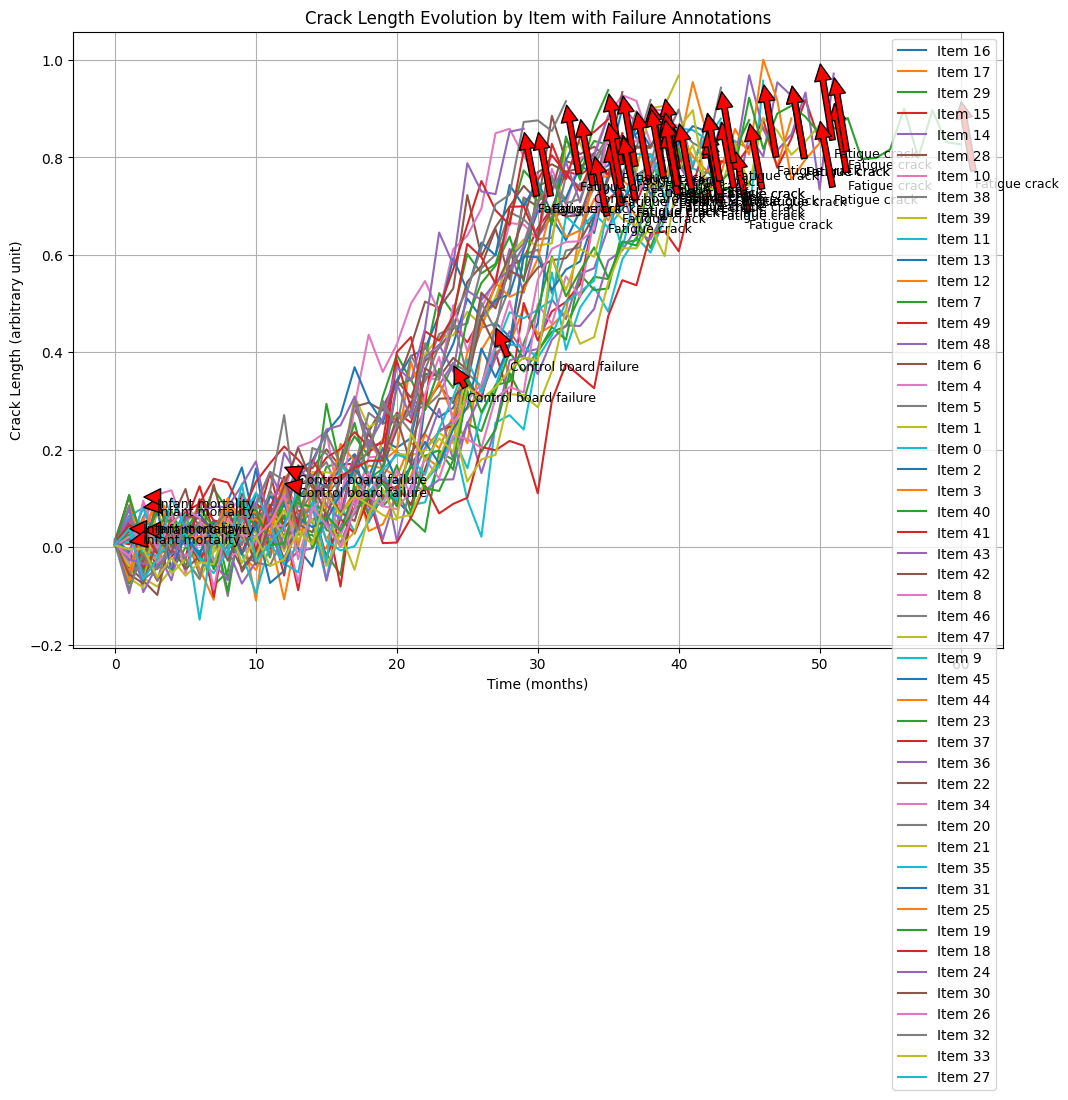

In [3]:
def plot_crack_length_by_item_with_failures(df):
    """
    Trace la courbe de l'évolution de la longueur de fissure en fonction du temps pour chaque item_id unique,
    et ajoute des annotations pour les moments de panne et le mode de défaillance.
    
    Parameters:
    df (pd.DataFrame): DataFrame contenant les colonnes 'time', 'crack length', 'item_id', 'Time to failure (months)', et 'Failure mode'.
    """
    # Créer une figure avec un sous-ensemble d'axes
    plt.figure(figsize=(12, 8))
    
    # Obtenir les item_ids uniques
    item_ids = df['item_id'].unique()
    
    for item_id in item_ids:
        # Filtrer les données pour l'item_id courant
        item_df = df[df['item_id'] == item_id]
        
        # Tracer la courbe pour cet item_id
        plt.plot(item_df['time (months)'], item_df['crack length (arbitary unit)'], label=f'Item {item_id}')
        
        # Trouver les données de panne pour cet item_id
        failure_data = item_df[['Time to failure (months)', 'Failure mode']].dropna().drop_duplicates()
        if not failure_data.empty:
            time_to_failure = failure_data['Time to failure (months)'].values[0]
            failure_mode = failure_data['Failure mode'].values[0]
            
            # Ajouter une annotation pour le moment de la panne
            plt.annotate(
                f'{failure_mode}', 
                xy=(time_to_failure, item_df['crack length (arbitary unit)'].max()), 
                xytext=(time_to_failure + 1, item_df['crack length (arbitary unit)'].max() * 0.8),
                arrowprops=dict(facecolor='red', shrink=0.05),
                fontsize=9
            )
    
    # Ajouter des labels et un titre
    plt.xlabel('Time (months)')
    plt.ylabel('Crack Length (arbitrary unit)')
    plt.title('Crack Length Evolution by Item with Failure Annotations')
    plt.legend()
    plt.grid(True)
    
    # Afficher le graphique
    plt.show()

# Exemple d'utilisation
plot_crack_length_by_item_with_failures(combined_data)
